# Comparison Real Robot VS Simulation Experiments (Maze formation)

In [2]:
%store -r REALROBOT_MAZE_FINISHING_TIMES
%store -r SIMULATION_MAZE_FINISHING_TIMES
%store -r REALROBOT_MAZE_COMMUNICATION_COST
%store -r SIMULATION_MAZE_COMMUNICATION_COST
%store -r SIMULATION_MAZE_COMMUNICATION_COST_LIMIT
%store -r REALROBOT_MAZE_PRIVACY_COEEFICIENT
%store -r SIMULATION_MAZE_INFORMATION_DIVERSITY

In [3]:
%matplotlib inline  
# Load the libraries
import glob2, re
import pandas as pd
import numpy as np
import json
import networkx as nx
import community as comm
from collections import Counter
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap

In [4]:
# Specify the search terms for filtering the files
ROBOT_RANGE = range(16,29)
TOKEN_RANGE = range(16,17)
DENSITY_OF_TOKENS = '\d'
TIMEOUT_THRESHOLD = 5100

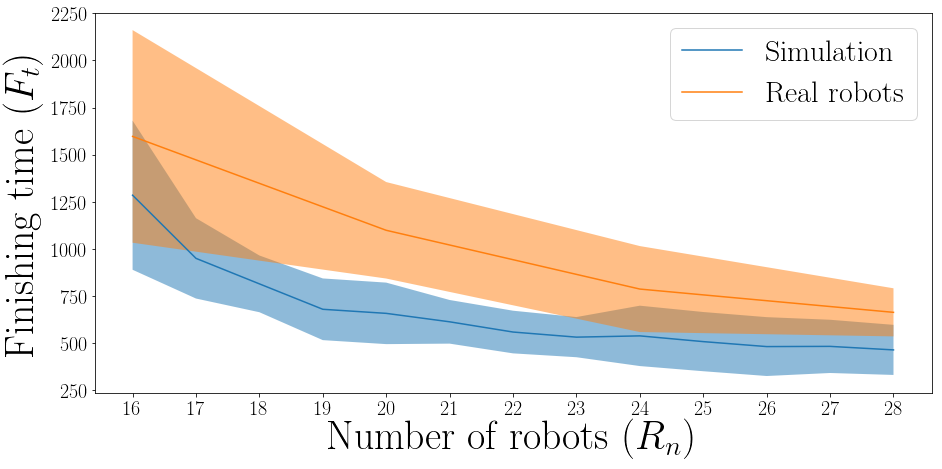

In [7]:
# Finishing Time Calculation
plt.figure(figsize=(15,7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    robot_array =[d2[y] for d2 in [d1[:] for d1 in SIMULATION_MAZE_FINISHING_TIMES[:-4]]]
    rr = np.array(ROBOT_RANGE)
    mean = map(np.nanmean, zip(robot_array))
    std_deviation = map(np.nanstd, zip(robot_array))
    plt.plot(rr, mean, label='Simulation')
    plt.fill_between(rr, np.array(mean) - np.array(std_deviation), np.array(mean) + np.array(std_deviation), alpha=0.5)

for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    robot_array =[d1[:] for d1 in REALROBOT_MAZE_FINISHING_TIMES]
    rr = np.array([16, 20, 24, 28])
    mean = map(np.nanmean, zip(robot_array))
    std_deviation = map(np.nanstd, zip(robot_array))
    plt.plot(rr, mean, label='Real robots')
    plt.fill_between(rr, np.array(mean) - np.array(std_deviation), np.array(mean) + np.array(std_deviation), alpha=0.5)    
    

plt.legend(loc=1, prop={'size': 30})
plt.tick_params(labelsize=20)
plt.xticks(np.array(ROBOT_RANGE), tuple((i) for i in ROBOT_RANGE))
plt.xlabel('Number of robots' + ' ' +  r'$(R_{n})$' , fontsize=40)
plt.ylabel('Finishing time' + ' ' + r'$(F_{t})$', fontsize=40)
#plt.axis([15, 28, 0, TIMEOUT_THRESHOLD-3000])
plt.show()

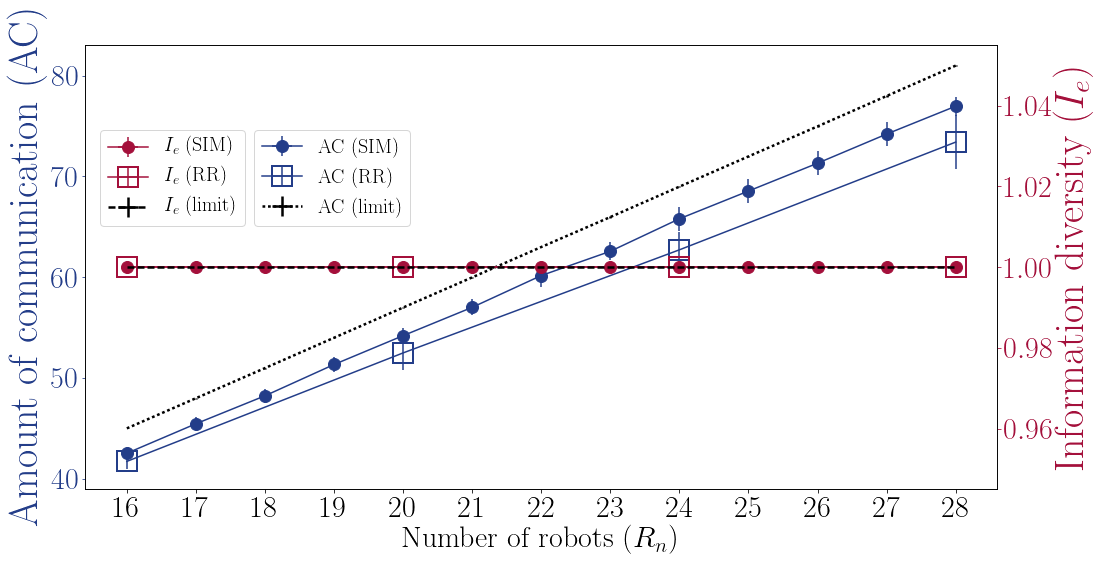

In [32]:
# Communication Cost Vs Information Diversity
fig, ax1 = plt.subplots(figsize=(15,8))


# CC Simulation
robot_row = []
robot_row_std = []

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    robot_row.append(np.nanmean(SIMULATION_MAZE_COMMUNICATION_COST[x]))
    robot_row_std.append(np.nanstd(SIMULATION_MAZE_COMMUNICATION_COST[x]))

ax1.errorbar(ROBOT_RANGE, robot_row, xerr=0, yerr=robot_row_std, marker='o', markersize=12, c='#233D89', label=str('AC (SIM)')) 
ax1.set_xlabel('Number of robots' + ' ' +  r'$(R_{n})$', fontsize=30)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Amount of communication (AC)', color='#233D89', fontsize=40)
ax1.tick_params('y', colors='#233D89')
plt.tick_params(labelsize=30)

# CC Real-Robots
robot_row = []
robot_row_std = []

for x, NUMBER_OF_ROBOTS in enumerate([16, 20, 24, 28]):
    robot_row.append(np.nanmean(REALROBOT_MAZE_COMMUNICATION_COST[x]))
    robot_row_std.append(np.nanstd(REALROBOT_MAZE_COMMUNICATION_COST[x]))

ax1.errorbar([16, 20, 24, 28], robot_row, xerr=0, yerr=robot_row_std, marker='s', markeredgewidth=2, fillstyle='none', color='#233D89', markersize=20, label=str('AC (RR)')) 
plt.legend(loc='center left',prop={'size': 20}, bbox_to_anchor=(0.005, 0.9))

# CC Last to complete Merkle tree
robot_row = []
robot_row_std = []

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    robot_row.append(np.nanmean(SIMULATION_MAZE_COMMUNICATION_COST_LIMIT[x]))
    robot_row_std.append(np.nanstd(SIMULATION_MAZE_COMMUNICATION_COST_LIMIT[x]))

ax1.errorbar(ROBOT_RANGE, robot_row, xerr=0, yerr=robot_row_std, ls='dotted', lw=2.5, markersize=0, c='black', label='AC (limit)') 
ax1.set_xlabel('Number of robots' + ' ' +  r'$(R_{n})$', fontsize=30)
plt.legend(loc='center',prop={'size': 20}, bbox_to_anchor=(0.27, 0.7))

# Information Diversity 
ax2 = ax1.twinx()

# Information Diversity Simulation
robot_row = []
robot_row_std = []

for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
    robot_row.append(np.nanmean(SIMULATION_MAZE_INFORMATION_DIVERSITY[x]))
    robot_row_std.append(np.nanstd(SIMULATION_MAZE_INFORMATION_DIVERSITY[x]))

ax2.errorbar(ROBOT_RANGE, robot_row, xerr=0, yerr=robot_row_std, marker='o', c='#A4103B', markersize=12, label=str(r'$I_{e}$' + ' ' + '(SIM)')) 

# Information Diversity Real Robots
robot_row = []
robot_row_std = []

for x, NUMBER_OF_ROBOTS in enumerate([16, 20, 24, 28]):
    robot_row.append(np.nanmean([i for i in REALROBOT_MAZE_PRIVACY_COEEFICIENT[x] if i is not None]))
    robot_row_std.append(np.nanstd([i for i in REALROBOT_MAZE_PRIVACY_COEEFICIENT[x] if i is not None]))
    
ax2.errorbar([16, 20, 24, 28], robot_row, xerr=0, yerr=robot_row_std, marker='s', markeredgewidth=2, fillstyle='none', color='#A4103B', markersize=20, label=str(r'$I_{e}$' + ' ' + '(RR)')) 

# Limit for Privacy
ax2.errorbar(range(16,29), np.ones(13), xerr=0, yerr=0, c='black', ls='dashed', label=str(r'$I_{e}$ (limit)'), lw=2.5) 

ax2.set_ylabel('Information diversity' + ' ' + r'$(I_{e})$', color='#A4103B', fontsize=40)
ax2.tick_params('y', colors='#A4103B')
fig.tight_layout()
plt.xticks(np.array(ROBOT_RANGE), tuple((i) for i in ROBOT_RANGE))
plt.tick_params(labelsize=30)
plt.legend(loc='center left',prop={'size': 20}, bbox_to_anchor=(0.005, 0.7))
plt.show()